<font size="6">Pre-Processing and Training Data Development</font>

In this notebook the data that was cleaned in the previous notebook will be used to prepare for modelling in the future notbooks. The columns without stroke feature will be seperated as a target variable. Also, the numerical variables and cateogrical variables will be dealt seperately as well. Numerical variables will be scaled and categorical variables will be encoded to have numerical variables represent them. 

Lastly, the train and test sets will be splitted for predictor and target variable(stroke). Also logistic regression will be used initially to find out how it does in terms of accuracy.

Import tools and load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay

In [3]:
df=pd.read_csv('..\Capstone-2-Data-wranglling\healthcare-dataset-stroke-data.csv',index_col='id')

In [4]:
df=df[df['gender']!='Other']
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


bmi columns missing values are replaced with median of its own.

In [5]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [6]:
df_cleaned=df

In [7]:
df_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


Select all the columns except for stroke and seperate them into two variables.

In [8]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

In [9]:
X=df_cleaned[features]
y=df_cleaned.stroke

In [10]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked


In [11]:
y

id
9046     1
51676    1
31112    1
60182    1
1665     1
        ..
18234    0
44873    0
19723    0
37544    0
44679    0
Name: stroke, Length: 5109, dtype: int64

The proportion of the classes were calculated before the train/test split.

In [12]:
a=df_cleaned['stroke'].value_counts(normalize=True)
percent_stroke=round(a,4)
percent_stroke*100

0    95.13
1     4.87
Name: stroke, dtype: float64

Numeric and Categorical data was seperated before the stnadard scale was applied by using the number of unique values in each column. 

In [13]:
numeric_data=df_cleaned.loc[:,df.nunique()>5]
a=numeric_data.columns
b=a.to_list()
categorical_data=df_cleaned.drop(columns=(b),axis=1)
categorical_data.drop('stroke',axis=1,inplace=True)
categorical_data

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
id,,,,,,,
9046,Male,0,1,Yes,Private,Urban,formerly smoked
51676,Female,0,0,Yes,Self-employed,Rural,never smoked
31112,Male,0,1,Yes,Private,Rural,never smoked
60182,Female,0,0,Yes,Private,Urban,smokes
1665,Female,1,0,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...
18234,Female,1,0,Yes,Private,Urban,never smoked
44873,Female,0,0,Yes,Self-employed,Urban,never smoked
19723,Female,0,0,Yes,Self-employed,Rural,never smoked


In [14]:
df_cleaned[b]

,age,avg_glucose_level,bmi
id,,,
9046,67.0,228.69,36.6
51676,61.0,202.21,28.1
31112,80.0,105.92,32.5
60182,49.0,171.23,34.4
1665,79.0,174.12,24.0
...,...,...,...
18234,80.0,83.75,28.1
44873,81.0,125.20,40.0
19723,35.0,82.99,30.6


In [15]:
df_preprocessing=df_cleaned.copy(deep=True)

In [16]:
df_preprocessing

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [58]:
X=df_preprocessing[features]
y=df_preprocessing.stroke

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [60]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
45163,Female,47.0,0,0,Yes,Private,Urban,99.36,23.8,smokes
22330,Female,45.0,0,0,Yes,Self-employed,Urban,82.94,29.3,Unknown
43016,Male,10.0,0,0,No,children,Urban,70.70,25.4,Unknown
40980,Male,79.0,1,0,Yes,Self-employed,Urban,72.04,23.6,formerly smoked
1183,Male,39.0,0,0,Yes,Private,Rural,84.18,28.1,smokes


In [61]:
y_train

id
45163    0
22330    0
43016    0
40980    0
1183     0
        ..
67217    0
34376    0
10752    0
56939    1
43496    0
Name: stroke, Length: 3576, dtype: int64

In [62]:
stdscaler=StandardScaler()
X_train[b]=stdscaler.fit_transform(X_train[b])
X_test[b]=stdscaler.transform(X_test[b])

In [63]:
X_train[b]

,age,avg_glucose_level,bmi
id,,,
45163,0.165303,-0.137694,-0.645508
22330,0.077127,-0.507807,0.069256
43016,-1.465950,-0.783702,-0.437577
40980,1.576116,-0.753498,-0.671500
1183,-0.187400,-0.479857,-0.086693
...,...,...,...
67217,0.077127,-0.284206,0.823007
34376,-1.201422,0.180352,-1.204324
10752,0.782534,-0.604506,0.965960


In [64]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
45163,Female,0.165303,0,0,Yes,Private,Urban,-0.137694,-0.645508,smokes
22330,Female,0.077127,0,0,Yes,Self-employed,Urban,-0.507807,0.069256,Unknown
43016,Male,-1.465950,0,0,No,children,Urban,-0.783702,-0.437577,Unknown
40980,Male,1.576116,1,0,Yes,Self-employed,Urban,-0.753498,-0.671500,formerly smoked
1183,Male,-0.187400,0,0,Yes,Private,Rural,-0.479857,-0.086693,smokes
...,...,...,...,...,...,...,...,...,...,...
67217,Female,0.077127,0,0,Yes,Private,Urban,-0.284206,0.823007,formerly smoked
34376,Female,-1.201422,0,0,No,children,Rural,0.180352,-1.204324,Unknown
10752,Female,0.782534,0,0,Yes,Private,Rural,-0.604506,0.965960,formerly smoked


StamdardScaler was applied to numerical columns

In [65]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked


Encoding was done for categorical columns

In [66]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [67]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
45163,0.165303,0,0,-0.137694,-0.645508,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
22330,0.077127,0,0,-0.507807,0.069256,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0
43016,-1.465950,0,0,-0.783702,-0.437577,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0
40980,1.576116,1,0,-0.753498,-0.671500,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
1183,-0.187400,0,0,-0.479857,-0.086693,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67217,0.077127,0,0,-0.284206,0.823007,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
34376,-1.201422,0,0,0.180352,-1.204324,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
10752,0.782534,0,0,-0.604506,0.965960,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


Train/Test split was conducted with optimizing the proportion of the classes by startifying the target variable.

In [68]:
y_train

id
45163    0
22330    0
43016    0
40980    0
1183     0
        ..
67217    0
34376    0
10752    0
56939    1
43496    0
Name: stroke, Length: 3576, dtype: int64

y_train and y_test set also has proportion of about 4.9 percent of stroke samples in the dataset and it is same as before the split.

In [69]:
round(y_train.value_counts(normalize=True)*100,2)

0    95.13
1     4.87
Name: stroke, dtype: float64

In [70]:
round(y_test.value_counts(normalize=True)*100,2)

0    95.11
1     4.89
Name: stroke, dtype: float64

Logistic Regssion algorithm was applied and predicted the values

In [71]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
ypred=LR.predict(X_test)

Accuracy sscore for test and training sets and classification report are calculated.

In [72]:
print(accuracy_score(y_test,ypred))

0.9523809523809523


In [73]:
Xpred=LR.predict(X_train)

In [74]:
print(accuracy_score(y_train,Xpred))

0.9513422818791947


In [75]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       1.00      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.51      1533
weighted avg       0.95      0.95      0.93      1533



Confusion Matrix and ROC curve was plotted also, Area under the curve was calculated for ROC curve.

In [76]:
cf_mat=confusion_matrix(y_test,ypred)

In [77]:
cf_mat

array([[1458,    0],
       [  73,    2]], dtype=int64)

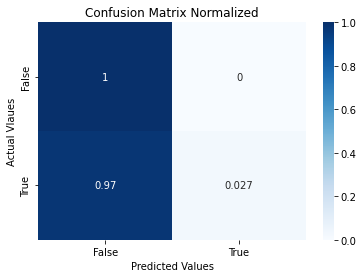

In [78]:
cmn = cf_mat.astype('float') / cf_mat.sum(axis=1)[:, np.newaxis]
_=sns.heatmap(cmn,annot=True,cmap='Blues')
_.set_title('Confusion Matrix Normalized')
_.set_xlabel('Predicted Values')
_.set_ylabel('Actual Vlaues')
_.xaxis.set_ticklabels(['False','True'])
_.yaxis.set_ticklabels(['False','True'])
plt.show()

In [79]:
y_scores_LR=LR.predict_proba(X_test)[:,1]
f_lr,t_lr,_=roc_curve(y_test,y_scores_LR)
roc_auc_LR=auc(f_lr,t_lr)
round(roc_auc_LR,2)

0.84

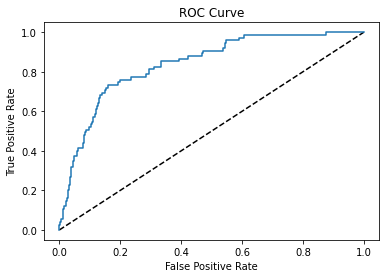

In [80]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(f_lr, t_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Conclusion:


In conclusion the accuracy score of the training and test set had above 95 percent. Also as the ROC curve and AUC shows the area under the curve is 84 percent therefore it can be concluded that the model performs well. However, as the classification and confusion matrix shows, it has significantly low number on prediction where stroke case is 'True'. It means the model is not performing well on predicting when the person actually has stroke. It is due to imbalanced classes since the proportion of stroke in the dataset is below 5 percent. Therefore it the model predicts 'No stroke' to every people, it still shows that the model accuracy is high. 

In the next notebook, the imbalanced classification will be dealt before applying it to other algorithm models and the classification report for models will be calculated and compared if it si performing well compare to the logistic regression model we have on this notebook. 

In [198]:
df_preprocessing.to_csv('preprocessed.csv')

In [199]:
df_cleaned.to_csv('cleaned.csv')

In [200]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')